In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For Reproducibility
# torch.manual_seed(1)

if cuda:
    torch.cuda.manual_seed(1)
print(torch.cuda.get_device_name(0))

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? True
Tesla P100-PCIE-16GB


In [2]:
# Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
gdrivepath="gdrive/My Drive/Colab Notebooks/S7/"
# !pip install tqdm
!ls

gdrive	sample_data


In [4]:
# File Already available hence commented.
# copying from gdrive to current directory of colab
!pwd
!cp "gdrive/My Drive/Colab Notebooks/S7/test.py" test.py
!cp "gdrive/My Drive/Colab Notebooks/S7/model.py" model.py
!cp "gdrive/My Drive/Colab Notebooks/S7/train.py" train.py
!cp "gdrive/My Drive/Colab Notebooks/S7/data.py" data.py
!cp "gdrive/My Drive/Colab Notebooks/S7/utils.py" utils.py
!cp "gdrive/My Drive/Colab Notebooks/S7/summary.py" summary.py
!ls

/content
data.py  gdrive  model.py  sample_data	summary.py  test.py  train.py  utils.py


In [5]:
print("Gdrive Colab Dir")
print("----------------")
!ls "gdrive/My Drive/Colab Notebooks/S7"
print("Current Directory")
print("----------------")
!ls

Gdrive Colab Dir
----------------
data.py  images  model.py  savedmodel  summary.py  test.py  train.py  utils.py
Current Directory
----------------
data.py  gdrive  model.py  sample_data	summary.py  test.py  train.py  utils.py


CUDA Available? True


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


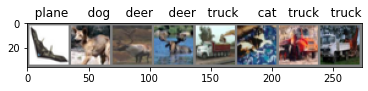

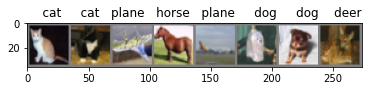

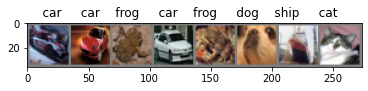

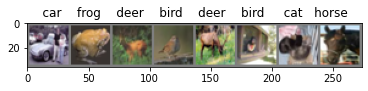

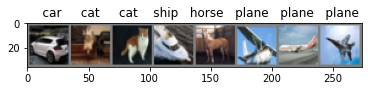

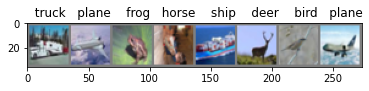

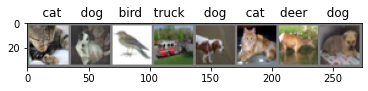

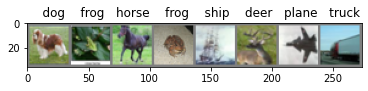

In [6]:
import data
train_loader, test_loader = data.loader(128)
data.display()

In [7]:
import model as m

In [8]:
!pip install torchsummary
import summary
summary.summ(device)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
         Dropout2d-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
        Dropout2d-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1

In [ ]:
#!ls
#!rm test.py data.py  model.py test.py utils.py summary.py  train.py
#!ls

In [9]:
import train as tr
import test as te

In [10]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

model = m.Net(True).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)
#scheduler = StepLR(optimizer, step_size= 10, gamma= 0.1)
epochs = 50

for epoch in range(epochs):
  print('EPOCH: ', epoch+1)
  tr.train(model, device, train_loader, optimizer, epoch)
  #scheduler.step()
  te.test(model, device, test_loader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH:  1


Loss=1.5853469371795654 Batch_id=390 Accuracy=32.22: 100%|██████████| 391/391 [00:13<00:00, 28.08it/s]



Test set: Average loss: 1.4136, Accuracy: 4758/10000 (47.58%)



  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH:  2


Loss=1.2105377912521362 Batch_id=390 Accuracy=46.07: 100%|██████████| 391/391 [00:14<00:00, 27.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2188, Accuracy: 5597/10000 (55.97%)

EPOCH:  3


Loss=1.3232696056365967 Batch_id=390 Accuracy=53.82: 100%|██████████| 391/391 [00:13<00:00, 28.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0146, Accuracy: 6351/10000 (63.51%)

EPOCH:  4


Loss=1.1523886919021606 Batch_id=390 Accuracy=59.46: 100%|██████████| 391/391 [00:13<00:00, 27.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9096, Accuracy: 6774/10000 (67.74%)

EPOCH:  5


Loss=0.9868851900100708 Batch_id=390 Accuracy=62.88: 100%|██████████| 391/391 [00:13<00:00, 28.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8333, Accuracy: 7050/10000 (70.50%)

EPOCH:  6


Loss=1.0466177463531494 Batch_id=390 Accuracy=65.88: 100%|██████████| 391/391 [00:14<00:00, 27.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7768, Accuracy: 7267/10000 (72.67%)

EPOCH:  7


Loss=0.9791812896728516 Batch_id=390 Accuracy=67.77: 100%|██████████| 391/391 [00:13<00:00, 28.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7297, Accuracy: 7444/10000 (74.44%)

EPOCH:  8


Loss=0.8945215940475464 Batch_id=390 Accuracy=69.94: 100%|██████████| 391/391 [00:14<00:00, 27.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6957, Accuracy: 7570/10000 (75.70%)

EPOCH:  9


Loss=0.7678076028823853 Batch_id=390 Accuracy=71.28: 100%|██████████| 391/391 [00:14<00:00, 27.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6934, Accuracy: 7549/10000 (75.49%)

EPOCH:  10


Loss=0.6786033511161804 Batch_id=390 Accuracy=72.48: 100%|██████████| 391/391 [00:14<00:00, 27.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6763, Accuracy: 7637/10000 (76.37%)

EPOCH:  11


Loss=0.5539202690124512 Batch_id=390 Accuracy=73.96: 100%|██████████| 391/391 [00:13<00:00, 27.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6136, Accuracy: 7885/10000 (78.85%)

EPOCH:  12


Loss=0.7958084344863892 Batch_id=390 Accuracy=74.63: 100%|██████████| 391/391 [00:14<00:00, 27.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6024, Accuracy: 7908/10000 (79.08%)

EPOCH:  13


Loss=0.7738630175590515 Batch_id=390 Accuracy=75.60: 100%|██████████| 391/391 [00:14<00:00, 27.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6040, Accuracy: 7915/10000 (79.15%)

EPOCH:  14


Loss=0.7394244074821472 Batch_id=390 Accuracy=76.27: 100%|██████████| 391/391 [00:13<00:00, 27.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5994, Accuracy: 7913/10000 (79.13%)

EPOCH:  15


Loss=0.4920608103275299 Batch_id=390 Accuracy=77.11: 100%|██████████| 391/391 [00:13<00:00, 28.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5715, Accuracy: 8028/10000 (80.28%)

EPOCH:  16


Loss=0.9809246063232422 Batch_id=390 Accuracy=77.91: 100%|██████████| 391/391 [00:14<00:00, 27.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5516, Accuracy: 8107/10000 (81.07%)

EPOCH:  17


Loss=0.7312940359115601 Batch_id=390 Accuracy=78.24: 100%|██████████| 391/391 [00:14<00:00, 27.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5606, Accuracy: 8081/10000 (80.81%)

EPOCH:  18


Loss=0.39238303899765015 Batch_id=390 Accuracy=78.83: 100%|██████████| 391/391 [00:14<00:00, 27.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5482, Accuracy: 8131/10000 (81.31%)

EPOCH:  19


Loss=0.7843515872955322 Batch_id=390 Accuracy=79.26: 100%|██████████| 391/391 [00:14<00:00, 27.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5552, Accuracy: 8085/10000 (80.85%)

EPOCH:  20


Loss=0.5449661612510681 Batch_id=390 Accuracy=79.98: 100%|██████████| 391/391 [00:14<00:00, 27.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5218, Accuracy: 8227/10000 (82.27%)

EPOCH:  21


Loss=0.7417663931846619 Batch_id=390 Accuracy=80.26: 100%|██████████| 391/391 [00:14<00:00, 27.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5195, Accuracy: 8250/10000 (82.50%)

EPOCH:  22


Loss=0.4076828956604004 Batch_id=390 Accuracy=80.45: 100%|██████████| 391/391 [00:14<00:00, 27.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5167, Accuracy: 8217/10000 (82.17%)

EPOCH:  23


Loss=0.6199211478233337 Batch_id=390 Accuracy=81.05: 100%|██████████| 391/391 [00:14<00:00, 27.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5062, Accuracy: 8267/10000 (82.67%)

EPOCH:  24


Loss=0.6372724175453186 Batch_id=390 Accuracy=81.01: 100%|██████████| 391/391 [00:13<00:00, 27.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5222, Accuracy: 8234/10000 (82.34%)

EPOCH:  25


Loss=0.6060255765914917 Batch_id=390 Accuracy=81.55: 100%|██████████| 391/391 [00:13<00:00, 27.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5162, Accuracy: 8240/10000 (82.40%)

EPOCH:  26


Loss=0.5804929733276367 Batch_id=390 Accuracy=81.88: 100%|██████████| 391/391 [00:13<00:00, 27.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5053, Accuracy: 8320/10000 (83.20%)

EPOCH:  27


Loss=0.3596659004688263 Batch_id=390 Accuracy=82.23: 100%|██████████| 391/391 [00:14<00:00, 27.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5119, Accuracy: 8278/10000 (82.78%)

EPOCH:  28


Loss=0.5346933603286743 Batch_id=390 Accuracy=82.44: 100%|██████████| 391/391 [00:14<00:00, 27.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5129, Accuracy: 8265/10000 (82.65%)

EPOCH:  29


Loss=0.6114740371704102 Batch_id=390 Accuracy=82.63: 100%|██████████| 391/391 [00:14<00:00, 27.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4900, Accuracy: 8336/10000 (83.36%)

EPOCH:  30


Loss=0.32740575075149536 Batch_id=390 Accuracy=83.12: 100%|██████████| 391/391 [00:14<00:00, 27.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4846, Accuracy: 8368/10000 (83.68%)

EPOCH:  31


Loss=0.33535951375961304 Batch_id=390 Accuracy=83.22: 100%|██████████| 391/391 [00:14<00:00, 27.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4952, Accuracy: 8278/10000 (82.78%)

EPOCH:  32


Loss=0.7305866479873657 Batch_id=390 Accuracy=83.55: 100%|██████████| 391/391 [00:14<00:00, 27.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4905, Accuracy: 8362/10000 (83.62%)

EPOCH:  33


Loss=0.4402070939540863 Batch_id=390 Accuracy=83.77: 100%|██████████| 391/391 [00:13<00:00, 27.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4873, Accuracy: 8374/10000 (83.74%)

EPOCH:  34


Loss=0.431871235370636 Batch_id=390 Accuracy=83.99: 100%|██████████| 391/391 [00:14<00:00, 27.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4885, Accuracy: 8384/10000 (83.84%)

EPOCH:  35


Loss=0.6661481857299805 Batch_id=390 Accuracy=84.05: 100%|██████████| 391/391 [00:13<00:00, 28.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4878, Accuracy: 8370/10000 (83.70%)

EPOCH:  36


Loss=0.5247254371643066 Batch_id=390 Accuracy=84.32: 100%|██████████| 391/391 [00:13<00:00, 28.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4927, Accuracy: 8390/10000 (83.90%)

EPOCH:  37


Loss=0.5767439603805542 Batch_id=390 Accuracy=84.57: 100%|██████████| 391/391 [00:13<00:00, 28.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4893, Accuracy: 8380/10000 (83.80%)

EPOCH:  38


Loss=0.4807613790035248 Batch_id=390 Accuracy=84.82: 100%|██████████| 391/391 [00:13<00:00, 28.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4732, Accuracy: 8423/10000 (84.23%)

EPOCH:  39


Loss=0.4325811266899109 Batch_id=390 Accuracy=84.89: 100%|██████████| 391/391 [00:13<00:00, 28.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4747, Accuracy: 8419/10000 (84.19%)

EPOCH:  40


Loss=0.34350335597991943 Batch_id=390 Accuracy=85.01: 100%|██████████| 391/391 [00:13<00:00, 28.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4694, Accuracy: 8444/10000 (84.44%)

EPOCH:  41


Loss=0.7019128203392029 Batch_id=390 Accuracy=85.35: 100%|██████████| 391/391 [00:13<00:00, 28.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4784, Accuracy: 8420/10000 (84.20%)

EPOCH:  42


Loss=0.3292617201805115 Batch_id=390 Accuracy=85.47: 100%|██████████| 391/391 [00:13<00:00, 28.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4742, Accuracy: 8442/10000 (84.42%)

EPOCH:  43


Loss=0.36567285656929016 Batch_id=390 Accuracy=85.71: 100%|██████████| 391/391 [00:13<00:00, 28.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4717, Accuracy: 8439/10000 (84.39%)

EPOCH:  44


Loss=0.22519922256469727 Batch_id=390 Accuracy=85.68: 100%|██████████| 391/391 [00:13<00:00, 28.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4767, Accuracy: 8431/10000 (84.31%)

EPOCH:  45


Loss=0.4464414119720459 Batch_id=390 Accuracy=85.82: 100%|██████████| 391/391 [00:13<00:00, 28.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4843, Accuracy: 8407/10000 (84.07%)

EPOCH:  46


Loss=0.398429811000824 Batch_id=390 Accuracy=85.90: 100%|██████████| 391/391 [00:13<00:00, 28.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4686, Accuracy: 8466/10000 (84.66%)

EPOCH:  47


Loss=0.45902150869369507 Batch_id=390 Accuracy=86.13: 100%|██████████| 391/391 [00:13<00:00, 28.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4697, Accuracy: 8473/10000 (84.73%)

EPOCH:  48


Loss=0.5998370051383972 Batch_id=390 Accuracy=86.11: 100%|██████████| 391/391 [00:13<00:00, 28.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4676, Accuracy: 8471/10000 (84.71%)

EPOCH:  49


Loss=0.5287380814552307 Batch_id=390 Accuracy=86.51: 100%|██████████| 391/391 [00:13<00:00, 28.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4766, Accuracy: 8446/10000 (84.46%)

EPOCH:  50


Loss=0.48551708459854126 Batch_id=390 Accuracy=86.35: 100%|██████████| 391/391 [00:13<00:00, 28.45it/s]



Test set: Average loss: 0.4669, Accuracy: 8484/10000 (84.84%)



In [11]:
!ls "gdrive/My Drive/Colab Notebooks/S7/savedmodel"

classifier.pt



Test set: Average loss: 0.4669, Accuracy: 8484/10000 (84.84%)

(1516, 32, 32, 3)


<Figure size 432x288 with 0 Axes>

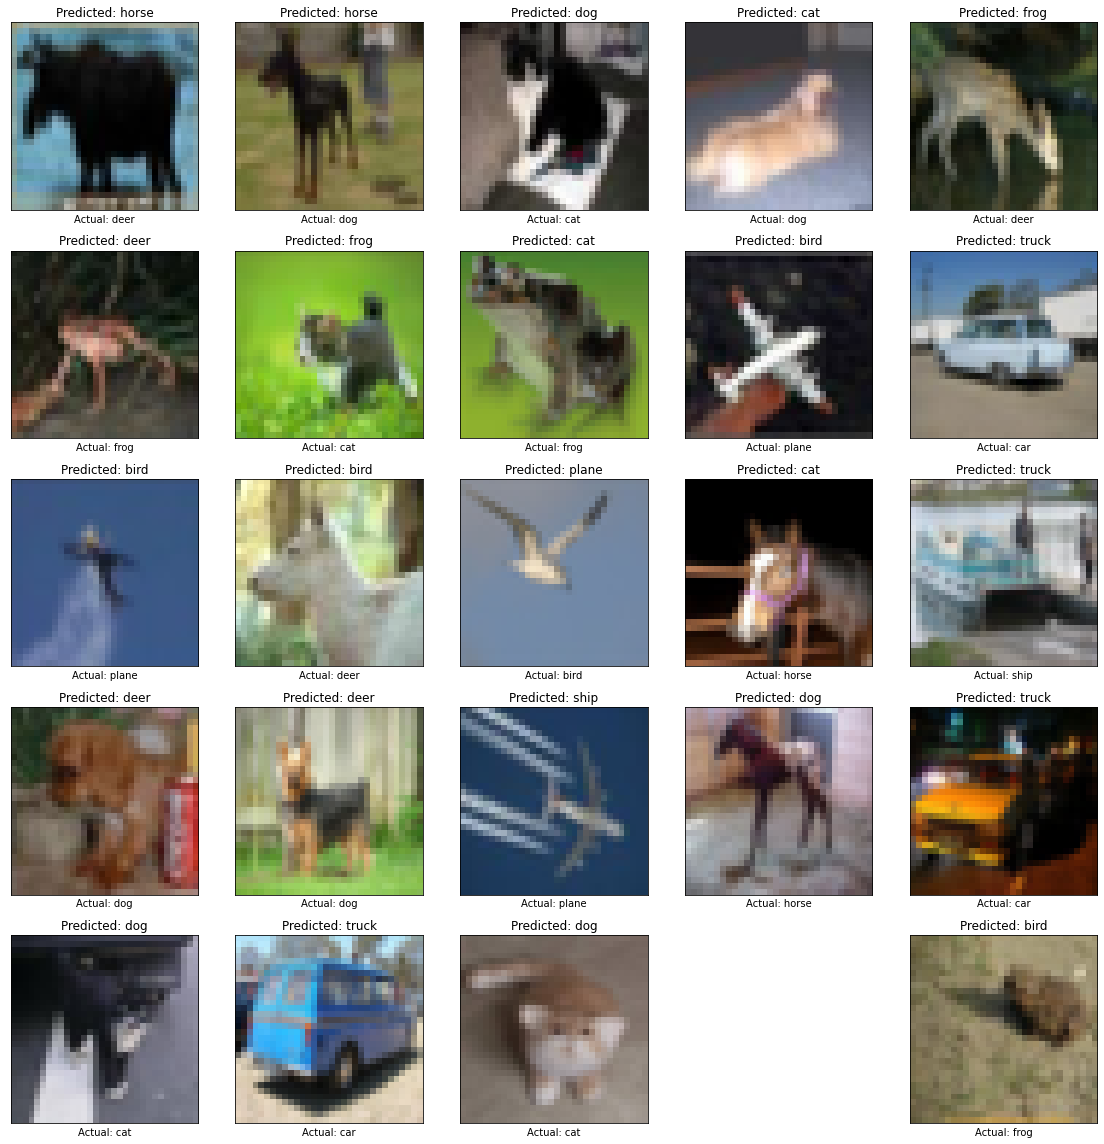

In [12]:
import utils as ut
path = gdrivepath + 'savedmodel/classifier.pt'
saved_model = m.Net(gbn= True).to(device)
saved_model.load_state_dict(torch.load(path))
saved_model.eval()
ut.mis(saved_model, device, test_loader, 25)

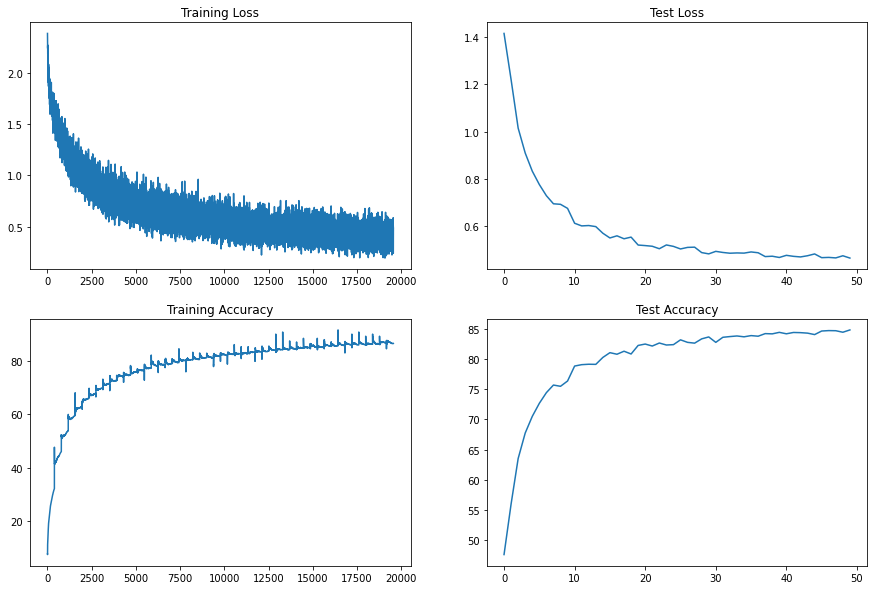

In [13]:
ut.graph()

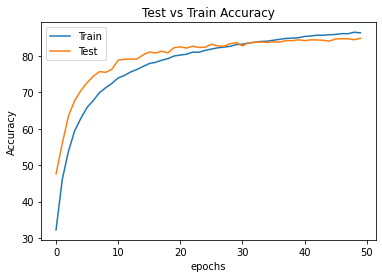

In [14]:
ut.testvtrain()

In [15]:
ut.class_acc(saved_model,device, test_loader)

Accuracy of plane : 83 %
Accuracy of   car : 91 %
Accuracy of  bird : 77 %
Accuracy of   cat : 67 %
Accuracy of  deer : 83 %
Accuracy of   dog : 80 %
Accuracy of  frog : 90 %
Accuracy of horse : 87 %
Accuracy of  ship : 92 %
Accuracy of truck : 92 %
